In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import data_catalog
import tseries_mod
import esmlab

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
experiment = '1pctCO2-cmip5'
ds_1pctCO2_cmip5 = xr.Dataset()
for varname in ['TS', 'SFCO2_LND', 'SFCO2_OCN']:
    da = tseries_mod.tseries_get(varname, 'atm', experiment, stream='cam2.h0')
    ds_1pctCO2_cmip5 = xr.merge((ds_1pctCO2_cmip5, da))
ds_1pctCO2_cmip5_ann = esmlab.climatology.compute_ann_mean(ds_1pctCO2_cmip5)
for varname in ['SFCO2_LND', 'SFCO2_OCN']:
    da = (-1.0) * ds_1pctCO2_cmip5_ann[varname].cumsum(dim='time', keep_attrs=True)
    da.name = varname+'_CUM'
    da.attrs['units'] = 'Pg'
    ds_1pctCO2_cmip5_ann = xr.merge((ds_1pctCO2_cmip5_ann, da))
print(ds_1pctCO2_cmip5_ann)

experiment = '1pctCO2-bgc-cmip5'
ds_1pctCO2_bgc_cmip5 = xr.Dataset()
for varname in ['TS', 'SFCO2_LND', 'SFCO2_OCN']:
    da = tseries_mod.tseries_get(varname, 'atm', experiment, stream='cam2.h0')
    ds_1pctCO2_bgc_cmip5 = xr.merge((ds_1pctCO2_bgc_cmip5, da))
ds_1pctCO2_bgc_cmip5_ann = esmlab.climatology.compute_ann_mean(ds_1pctCO2_bgc_cmip5)
for varname in ['SFCO2_LND', 'SFCO2_OCN']:
    da = (-1.0) * ds_1pctCO2_bgc_cmip5_ann[varname].cumsum(dim='time', keep_attrs=True)
    da.name = varname+'_CUM'
    da.attrs['units'] = 'Pg'
    ds_1pctCO2_bgc_cmip5_ann = xr.merge((ds_1pctCO2_bgc_cmip5_ann, da))
print(ds_1pctCO2_bgc_cmip5_ann)

<xarray.Dataset>
Dimensions:        (region: 1, tbnd: 2, time: 140)
Coordinates:
  * region         (region) object 'Global'
  * time           (time) object 0001-07-02 00:00:00 ... 0140-07-02 00:00:00
Dimensions without coordinates: tbnd
Data variables:
    TS             (time, region) float64 287.4 287.3 287.3 ... 291.4 291.4
    time_bnds      (tbnd, time) float64 0.0 365.0 730.0 ... 5.074e+04 5.11e+04
    co2vmr         (time) float64 0.0002862 0.0002891 ... 0.00113 0.001141
    ch4vmr         (time) float64 7.916e-07 7.916e-07 ... 7.916e-07 7.916e-07
    f11vmr         (time) float64 1.248e-11 1.248e-11 ... 1.248e-11 1.248e-11
    f12vmr         (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    n2ovmr         (time) float64 2.757e-07 2.757e-07 ... 2.757e-07 2.757e-07
    sol_tsi        (time) float64 1.361e+03 1.361e+03 ... 1.361e+03 1.361e+03
    SFCO2_LND      (time, region) float64 0.1788 -1.005 -1.347 ... 0.4464 -1.67
    SFCO2_OCN      (time, region) float64 -0.

In [4]:
experiment = '1pctCO2'
ds_1pctCO2 = xr.Dataset()
for varname in ['TS', 'SFCO2_LND', 'SFCO2_OCN']:
    da = tseries_mod.tseries_get(varname, 'atm', experiment)
    ds_1pctCO2 = xr.merge((ds_1pctCO2, da))
ds_1pctCO2_ann = esmlab.climatology.compute_ann_mean(ds_1pctCO2)
for varname in ['SFCO2_LND', 'SFCO2_OCN']:
    da = (-1.0) * ds_1pctCO2_ann[varname].cumsum(dim='time', keep_attrs=True)
    da.name = varname+'_CUM'
    da.attrs['units'] = 'Pg'
    ds_1pctCO2_ann = xr.merge((ds_1pctCO2_ann, da))
print(ds_1pctCO2_ann)

experiment = '1pctCO2-bgc'
ds_1pctCO2_bgc = xr.Dataset()
for varname in ['TS', 'SFCO2_LND', 'SFCO2_OCN']:
    da = tseries_mod.tseries_get(varname, 'atm', experiment)
    ds_1pctCO2_bgc = xr.merge((ds_1pctCO2_bgc, da))
ds_1pctCO2_bgc_ann = esmlab.climatology.compute_ann_mean(ds_1pctCO2_bgc)
for varname in ['SFCO2_LND', 'SFCO2_OCN']:
    da = (-1.0) * ds_1pctCO2_bgc_ann[varname].cumsum(dim='time', keep_attrs=True)
    da.name = varname+'_CUM'
    da.attrs['units'] = 'Pg'
    ds_1pctCO2_bgc_ann = xr.merge((ds_1pctCO2_bgc_ann, da))
print(ds_1pctCO2_bgc_ann)

<xarray.Dataset>
Dimensions:        (nbnd: 2, region: 1, time: 150)
Coordinates:
  * region         (region) object 'Global'
  * time           (time) object 0001-07-02 00:00:00 ... 0150-07-02 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    TS             (time, region) float64 288.0 288.2 288.2 ... 294.1 294.1
    time_bnds      (nbnd, time) float64 0.0 365.0 730.0 ... 5.438e+04 5.475e+04
    co2vmr         (time) float64 0.0002847 0.0002873 ... 0.00124 0.001253
    ch4vmr         (time) float64 8.082e-07 8.082e-07 ... 8.082e-07 8.082e-07
    f11vmr         (time) float64 3.211e-11 3.211e-11 ... 3.211e-11 3.211e-11
    f12vmr         (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    n2ovmr         (time) float64 2.73e-07 2.73e-07 ... 2.73e-07 2.73e-07
    sol_tsi        (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    SFCO2_LND      (time, region) float64 -0.1235 -0.05704 ... -5.666 -4.352
    SFCO2_OCN      (time, region) float64 0.2414 -0

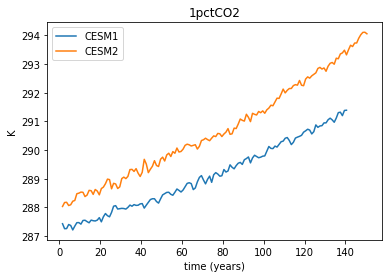

In [5]:
tseries_mod.tseries_plot_1var('TS', [ds_1pctCO2_cmip5_ann, ds_1pctCO2_ann],
                              ['CESM1', 'CESM2'], '1pctCO2', region_val='Global')

(-9.5, 1.5)

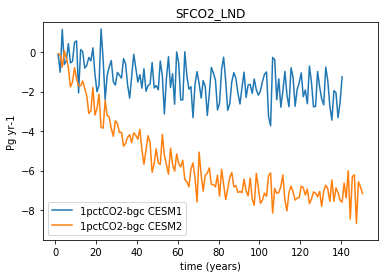

In [6]:
varname = 'SFCO2_LND'
tseries_mod.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                              ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], varname, region_val='Global')
plt.ylim(-9.5, 1.5)

(-600, 1300)

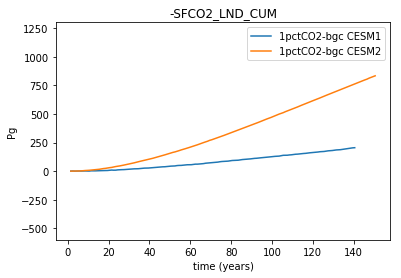

In [7]:
varname = 'SFCO2_LND_CUM'
tseries_mod.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                              ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], '-'+varname, region_val='Global')
plt.ylim(-600, 1300)

(-9.5, 1.5)

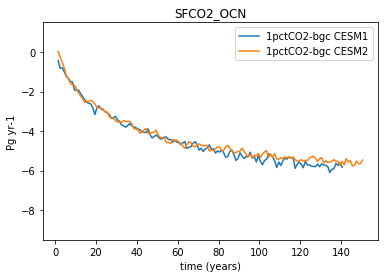

In [8]:
varname = 'SFCO2_OCN'
tseries_mod.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                              ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], varname, region_val='Global')
plt.ylim(-9.5, 1.5)

(-600, 1300)

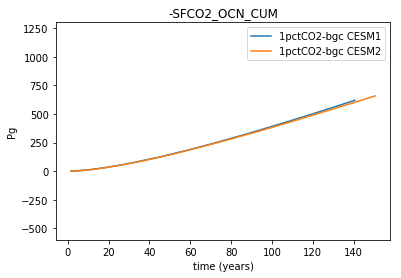

In [9]:
varname = 'SFCO2_OCN_CUM'
tseries_mod.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                              ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], '-'+varname, region_val='Global')
plt.ylim(-600, 1300)